In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Elsaka\AMIT\pandas\Data from ons\insurance-data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# first chack duplicated


In [4]:
df.duplicated().sum()

1

In [5]:
df.shape

(1338, 7)

# then drop the duplicated

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [7]:
df.shape

(1337, 7)

# Handling Outliers using IQR in continous features

# IQR(stander deviation)

In [9]:
def check_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers = []
    
    for i in range(len(df)):
        value = df.loc[i,colm]
        if value > upper_bound or value < lower_bound :
            outliers.append(value)
    return outliers

In [11]:
def handle_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    
    for i in range (len(df)):
        if df.loc[i,colm] < lower_bound :
            df.loc[i,colm] = lower_bound
        elif  df.loc[i,colm] > upper_bound:
             df.loc[i,colm] = upper_bound 
                
    
    

In [10]:
check_outliers('age',df)

[]

# conclusion
>- There is no outliers in age column

In [12]:
check_outliers('bmi',df)

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

In [13]:
handle_outliers('bmi',df)

In [14]:
check_outliers('bmi',df)

[]

# conclusion
>-we handled outliers in bmi column

# Explatory Data Analysis

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1- Age

In [16]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [17]:
df['age'].nunique()

47

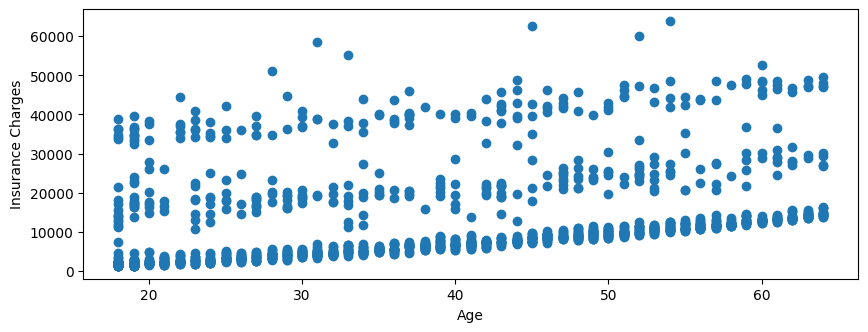

In [18]:
plt.figure(figsize=(10,3.5))
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

>- here is a linear relation between age and insurance cost

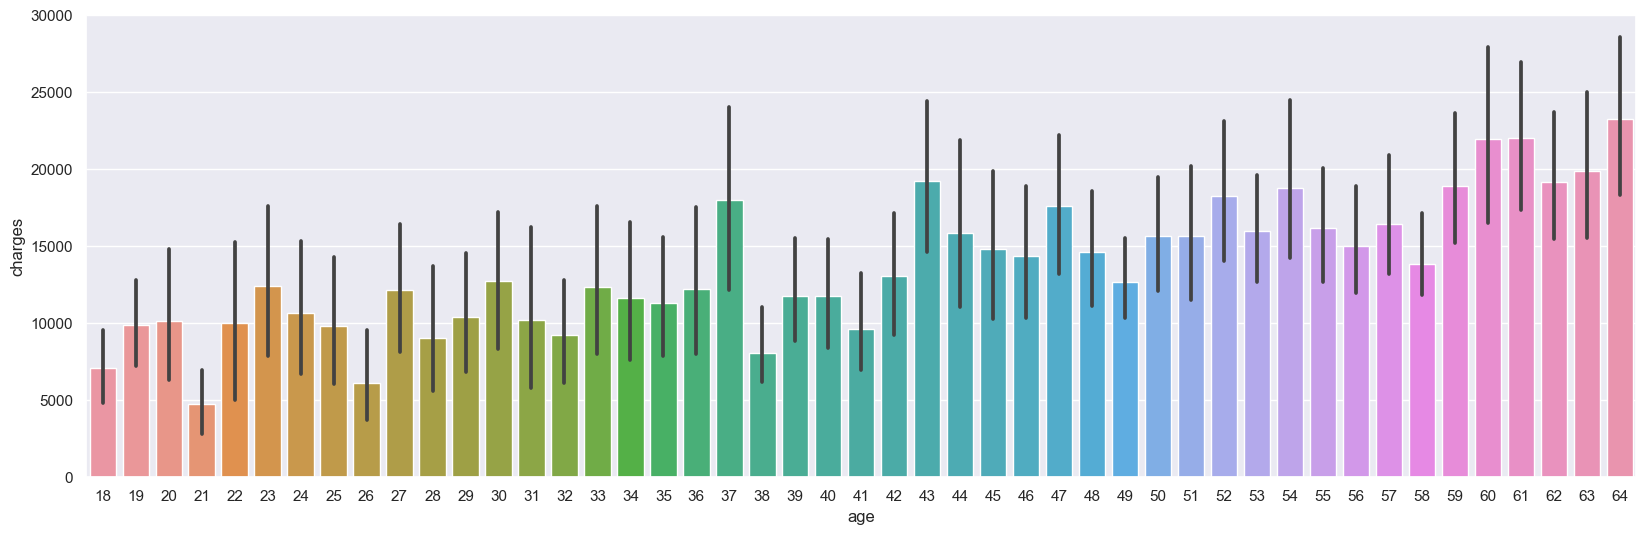

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(x= 'age', y='charges', data=df)
plt.show()

>- As we get older in age, we will likely have to visit medical centers,so the insurance increases

# What if the person is a smoker, Do the charges differ?

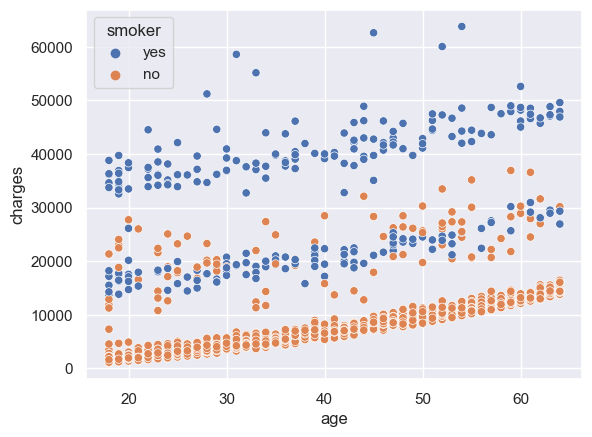

In [20]:
sns.scatterplot(x= 'age' , y= 'charges' , data= df , hue= 'smoker')
plt.show()

>- People that smokes pay a higher insurance cost than people that doesn't smoke

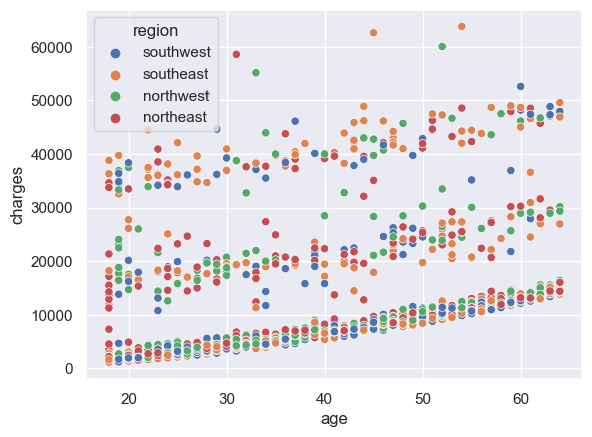

In [21]:
sns.scatterplot(x= 'age' , y= 'charges' , data= df , hue= 'region')
plt.show()

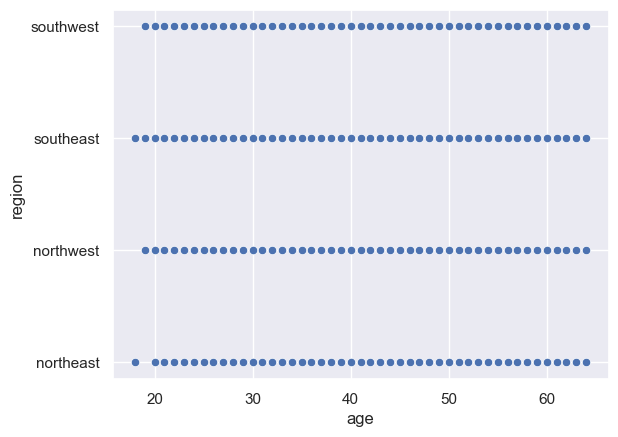

In [22]:
sns.scatterplot(x='age',y='region',data =df)
plt.show()

>- As we see the age and region are both independent Features


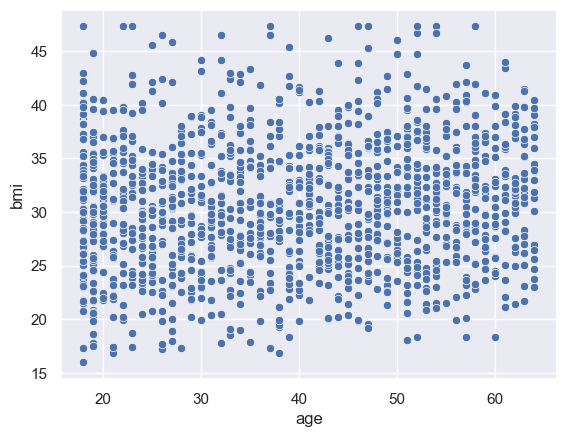

In [23]:
sns.scatterplot(x='age',y='bmi',data =df)
plt.show()

>- And also the body mass index is also independent with the age and so on for other features


# 2- bmi

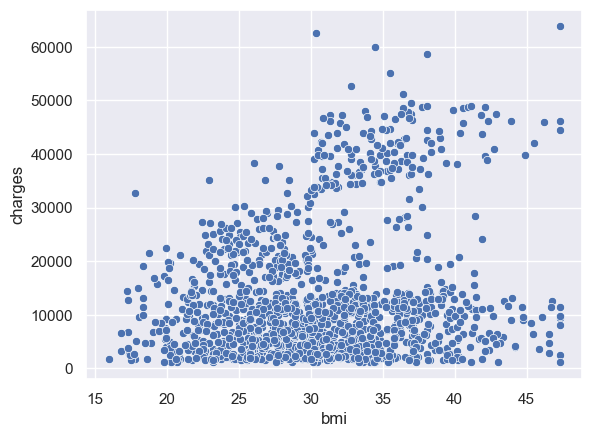

In [24]:
sns.scatterplot(x='bmi',y='charges',data =df)
plt.show()


>- The BMI doesn't have a real effect on insurance charges in this figure but there is a weak relation if the person is more obesed, he will get a higher insurance


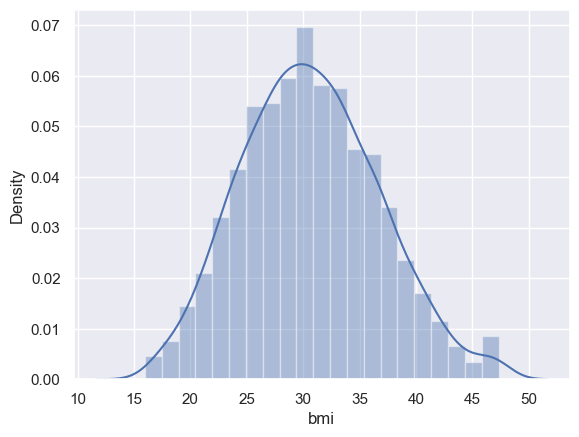

In [25]:
sns.distplot(df['bmi'])
plt.show()

>- With a value equal to 30 starts obesity. Let's start to explore! First, let's look at the distribution of costs in people with BMI greater than 30 and less than 30.

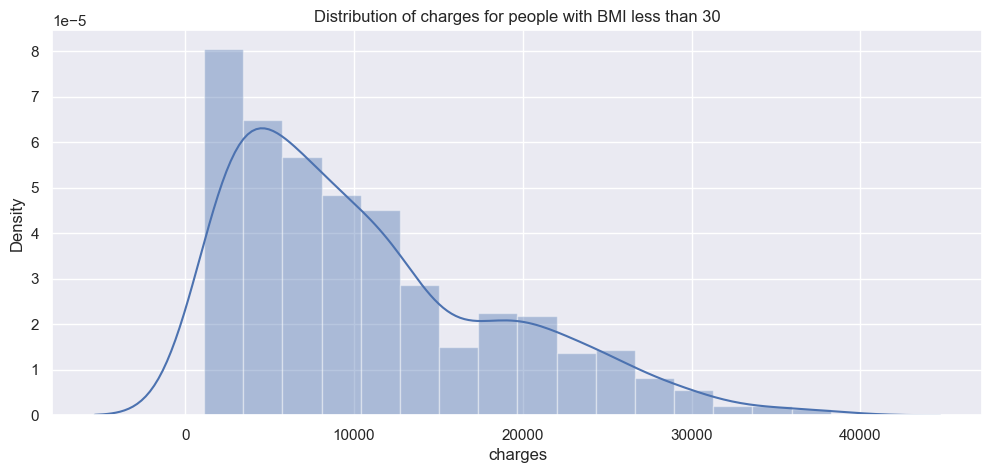

In [26]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI less than 30")
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.show()

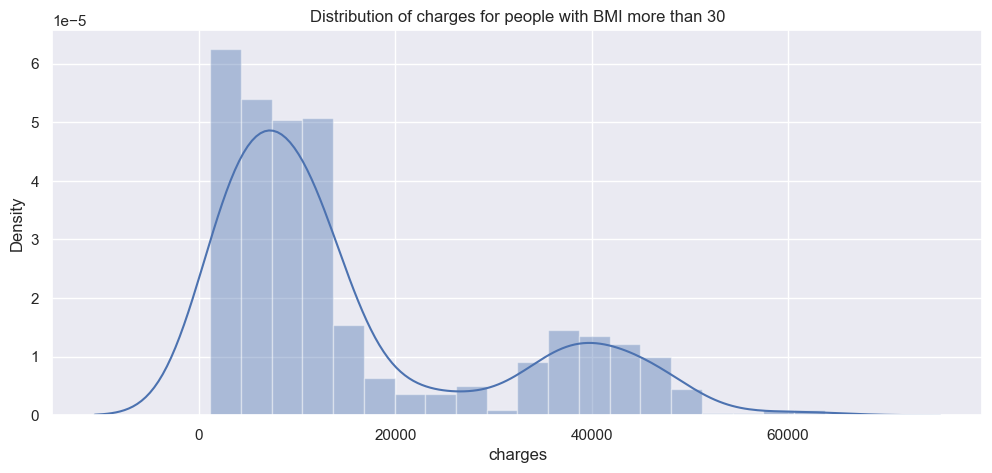

In [27]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI more than 30")
sns.distplot(df[(df.bmi > 30)]['charges'])
plt.show()

>- People with BMI above 30 will pay more insurance charges due to the probabilty of obesity problems

# What about the number of children?


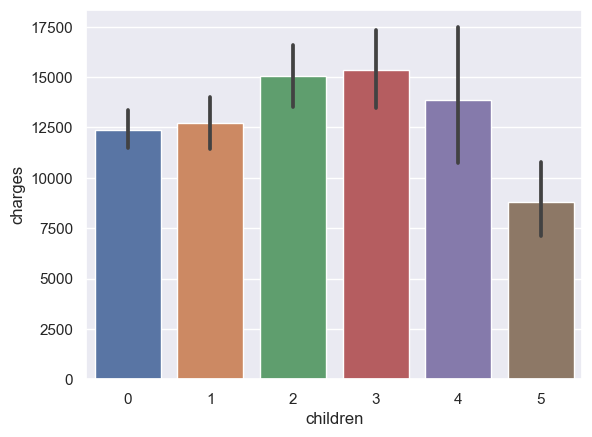

In [28]:
sns.barplot(x='children',y='charges',data =df)
plt.show()

>- As we see when you have more children your insurance cost will decrease


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Turn Categorical Data into numeric


>- First i will use label encoder for sex and smoker
>- second i will use one hot encoder for region to not biases one region to another

In [30]:
df['smoker']=df['smoker'].map({'no':0 ,'yes':1})
df['sex']=df['sex'].map({'female':0,'male':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


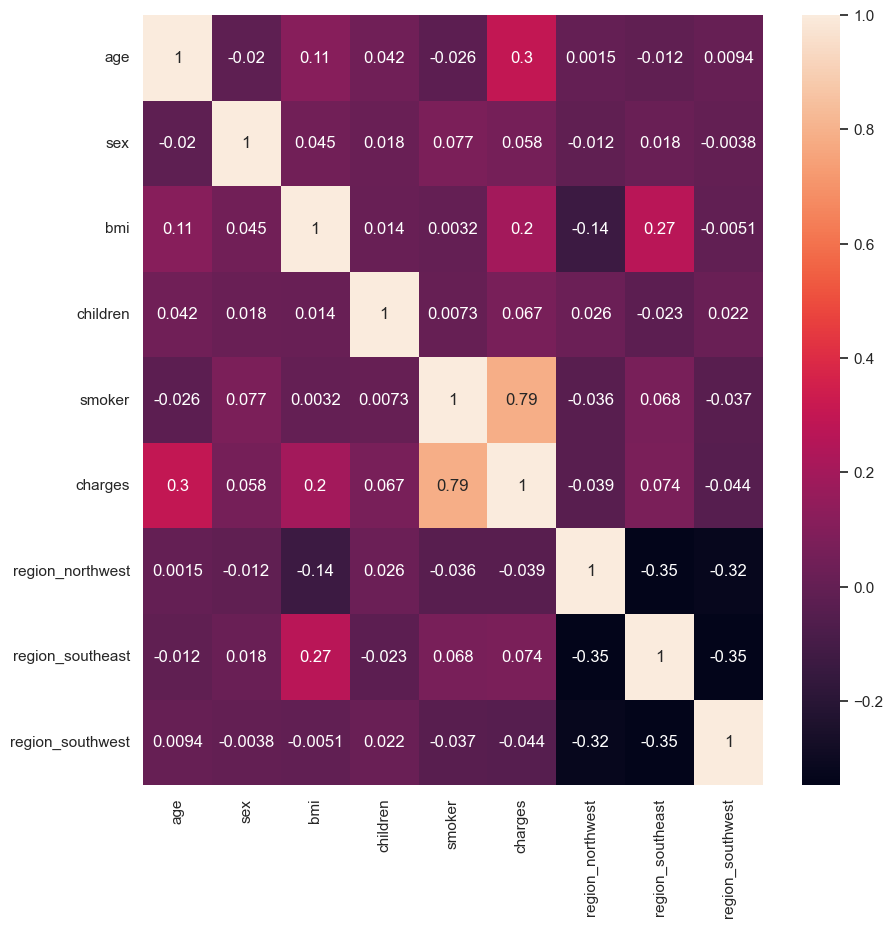

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot =True)
plt.show()

# Machine Learning Part


In [33]:
X = df.drop('charges',axis=1).values
y = df['charges'].values

>- divide data into features and labels (X,y)

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=120)

>- divide the data into training and testing


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

>- apply normalization (StandardScaler)

# our data is small so we can use Linear Regression or Polynomial Regression

In [36]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train , y_train)

LinearRegression()

In [37]:
model_1.score(X_test , y_test)

0.8335662998494214

In [38]:
model_1.score(X_train , y_train)

0.7402635225955799

In [39]:
y_pred = model_1.predict(X_test)
print(y_pred[:5])
print(y_train[:5])

[ 8712.38354607 34542.03095325  7333.29394048 16843.43362636
  5467.29738173]
[12269.68865  3935.1799   6799.458    4667.60765 36021.0112 ]


# regression metrics

In [40]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test , y_pred)
MAE

3581.7578011836063

>- mean_absolute_error

In [41]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test , y_pred)
MSE

26463660.02439538

>- mean_squared_error

In [42]:
from sklearn.metrics import median_absolute_error
MabsolutE = mean_absolute_error(y_test , y_pred)
MabsolutE

3581.7578011836063

>- median_absolute_error